# Applied Data Science Capstone - Car accident severity

Peer-graded Assignment

## Table of contents

* [Introduction - Bussines Problem](#Introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results](#Results)
* [Discussion](#Discussion) 
* [Conclusion](#Conclusion)

## Introduction - Business Problem <a name="Introduction"></a>

The objective is to predic the probability of severity of an accident (injury or property damage only) given the weather and road conditions. Prediction will be done with the Logistic Regression.

## Data <a name="Data"></a>

Data is extracted from csv file found on the Coursera Applied Data Science Capstone.

**Loading Data From Excel File**

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as plt
from matplotlib import pyplot

In [89]:
df = pd.read_excel("Data-Collisions.xlsx")
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-1.223231e+09,4.770314e+09,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-1.223473e+09,4.764717e+09,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-1.223345e+07,4.760787e+09,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-1.223348e+09,4.760480e+09,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-1.223064e+09,4.754574e+09,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


**Data pre-processing and selection**

In [90]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

df.dtypes

In [91]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [92]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

*Drop Columns*

Name: EXCEPTRSNCODE True 109862 False 84811

Name: SDOTCOLNUM False 114936 True 79737

Name: INTKEY True 129603 False 65070

In [93]:
df.drop(["EXCEPTRSNCODE","INTKEY","SDOTCOLNUM"], axis=1, inplace=True)

*Drop Rows with True Values*

WEATHER False 189592 True 5081

ROADCOND False 189661 True 5012

In [94]:
df.dropna(subset=["WEATHER","ROADCOND"], axis=0, inplace=True)

In [95]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [96]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    189543
Name: SEVERITYCODE, dtype: int64

X
False    184367
True       5176
Name: X, dtype: int64

Y
False    184367
True       5176
Name: Y, dtype: int64

OBJECTID
False    189543
Name: OBJECTID, dtype: int64

INCKEY
False    189543
Name: INCKEY, dtype: int64

COLDETKEY
False    189543
Name: COLDETKEY, dtype: int64

REPORTNO
False    189543
Name: REPORTNO, dtype: int64

STATUS
False    189543
Name: STATUS, dtype: int64

ADDRTYPE
False    187727
True       1816
Name: ADDRTYPE, dtype: int64

LOCATION
False    186985
True       2558
Name: LOCATION, dtype: int64

EXCEPTRSNDESC
True     184691
False      4852
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    189543
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    189543
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189522
True         21
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    189543
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    189543
Name: PEDCOUNT, dtype: int64

PEDC

*Count Values*

In [97]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    132451
Injury Collision                   57092
Name: SEVERITYDESC, dtype: int64

In [98]:
df['WEATHER'].value_counts()

Clear                       111116
Raining                      33141
Overcast                     27702
Unknown                      15080
Snowing                        907
Other                          830
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [99]:
df['ROADCOND'].value_counts()

Dry               124432
Wet                47450
Unknown            15068
Ice                 1206
Snow/Slush          1002
Other                132
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

*Dummy variables for Weather and Roadcond*

In [100]:
dummy_variable_1 = pd.get_dummies(df["WEATHER"])
dummy_variable_1.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [101]:
dummy_variable_1.rename(columns={'Blowing Sand/Dirt':'Weather - Blowing Sand/Dirt', 'Clear':'Weather - Clear', 'Fog/Smog/Smoke' : 'Weather - Fog/Smog/Smoke', 'Other':'Weather - Other', 'Overcast':'Weather - Overcast', 'Partly Cloudy':'Weather - Partly Cloudy', 'Raining':'Weather - Raining', 'Severe Crosswind':'Weather - Severe Crosswind', 'Sleet/Hail/Freezing Rain':'Weather - Sleet/Hail/Freezing Rain', 'Snowing':'Weather - Snowing', 'Unknown':'Weather - Unknown' }, inplace=True)
dummy_variable_1.head()

,Weather - Blowing Sand/Dirt,Weather - Clear,Weather - Fog/Smog/Smoke,Weather - Other,Weather - Overcast,Weather - Partly Cloudy,Weather - Raining,Weather - Severe Crosswind,Weather - Sleet/Hail/Freezing Rain,Weather - Snowing,Weather - Unknown
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [102]:
df = pd.concat([df, dummy_variable_1], axis=1)

In [103]:
dummy_variable_2 = pd.get_dummies(df["ROADCOND"])
dummy_variable_2.head()

,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [104]:
dummy_variable_2.rename(columns={'Dry':'Road Condition - Dry', 'Ice':'Road Condition - Ice', 'Oil' : 'Road Condition - Oil', 'Other':'Road Condition - Other', 'Sand/Mud/Dirt':'Road Condition - Sand/Mud/Dirt', 'Snow/Slush':'Road Condition - Snow/Slush', 'Standing Water':'Road Condition - Standing Water', 'Uknown':'Road Condition - Uknown', 'Wet':'Road Condition - Wet'}, inplace=True)
dummy_variable_2.head()

,Road Condition - Dry,Road Condition - Ice,Road Condition - Oil,Road Condition - Other,Road Condition - Sand/Mud/Dirt,Road Condition - Snow/Slush,Road Condition - Standing Water,Unknown,Road Condition - Wet
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [105]:
df = pd.concat([df, dummy_variable_2], axis=1)

In [106]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,Weather - Unknown,Road Condition - Dry,Road Condition - Ice,Road Condition - Oil,Road Condition - Other,Road Condition - Sand/Mud/Dirt,Road Condition - Snow/Slush,Road Condition - Standing Water,Unknown,Road Condition - Wet
0,2,-1.223231e+09,4.770314e+09,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,0,0,0,0,0,0,0,0,0,1
1,1,-1.223473e+09,4.764717e+09,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,0,0,0,0,0,0,0,0,0,1
2,1,-1.223345e+07,4.760787e+09,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,1,0,0,0,0,0,0,0,0
3,1,-1.223348e+09,4.760480e+09,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,0,1,0,0,0,0,0,0,0,0
4,2,-1.223064e+09,4.754574e+09,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,0,0,0,0,0,0,0,0,0,1


In [107]:
SEVERITY_df = df[['Weather - Clear', 'Weather - Raining', 'Road Condition - Dry', 'Road Condition - Wet', "SEVERITYCODE"]]
SEVERITY_df['SEVERITYCODE'] = SEVERITY_df['SEVERITYCODE'].astype('int')
SEVERITY_df['Weather - Clear'] = SEVERITY_df['Weather - Clear'].astype('float')
SEVERITY_df['Weather - Raining'] = SEVERITY_df['Weather - Raining'].astype('float')
SEVERITY_df['Road Condition - Dry'] = SEVERITY_df['Road Condition - Dry'].astype('float')
SEVERITY_df['Road Condition - Wet'] = SEVERITY_df['Road Condition - Wet'].astype('float')
SEVERITY_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Weather - Clear,Weather - Raining,Road Condition - Dry,Road Condition - Wet,SEVERITYCODE
0,0.0,0.0,0.0,1.0,2
1,0.0,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,1
3,1.0,0.0,1.0,0.0,1
4,0.0,1.0,0.0,1.0,2


In [108]:
SEVERITY_df.shape

(189543, 5)

## Methodology <a name="Methodology"></a>

For this project I will mainly concentrate on the Road and Weather Conditions to estimate severity of the accident.
Highest number of accidents is while Clear weather and Dry road conditions.

Next step is 

Analysis
Defining X 'Weather - Clear', 'Weather - Raining', 'Road Condition - Dry', 'Road Condition - Wet' , y 'SEVERITYCODE' for dataset.
Normalizing the dataset
Train/Test dataset
Modeling (Logistic Regression with Scikit-learn)
Evaluation

## Analysis <a name="Analysis"></a>

Basic explanatory data analysis

In [109]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,Weather - Unknown,Road Condition - Dry,Road Condition - Ice,Road Condition - Oil,Road Condition - Other,Road Condition - Sand/Mud/Dirt,Road Condition - Snow/Slush,Road Condition - Standing Water,Unknown,Road Condition - Wet
count,189543.000000,1.843670e+05,1.843670e+05,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,...,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000
mean,1.301209,-1.111814e+09,4.320883e+09,106753.640472,138306.315749,138500.099756,1.301209,2.459437,0.038086,0.029112,...,0.079560,0.656484,0.006363,0.000338,0.000696,0.000390,0.005286,0.000607,0.079496,0.250339
std,0.458784,3.341630e+08,1.309774e+09,62201.682978,85263.392584,85599.901876,0.458784,1.355171,0.200584,0.169434,...,0.270611,0.474883,0.079512,0.018372,0.026380,0.019755,0.072515,0.024624,0.270513,0.433209
min,1.000000,-1.224191e+09,4.763100e+04,1.000000,1001.000000,1001.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.223463e+09,4.755610e+09,53087.500000,69067.500000,69067.500000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-1.223262e+09,4.761107e+09,104165.000000,120490.000000,120490.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,-1.223011e+09,4.766109e+09,159920.500000,199009.500000,199149.500000,2.000000,3.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,-1.222907e+06,4.773414e+09,219547.000000,331342.000000,332842.000000,2.000000,81.000000,6.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
df.describe(include=['object'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,189543,189543,187727,186985,4852,189543,189522,189543,189543,183383,...,29767,189543,189543,189543,189337,4666,9324,189525,189522,189543
unique,189540,2,3,23947,1,2,10,5948,160101,7,...,1,4,11,9,9,1,1,63,62,2
top,1776526,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,2006-02-11 00:00:00,Mid-Block (not related to intersection),...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189540,123481,274,4852,132451,47900,96,96,86976,...,29767,100057,111116,124432,116077,4666,9324,44340,44340,182674


Text(0.5, 1.0, 'SEVERITYDESC bins')

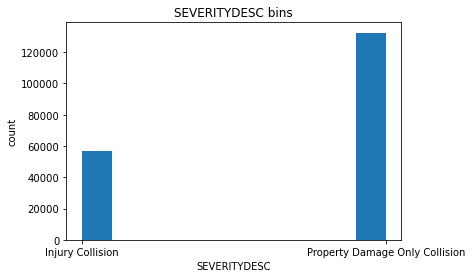

In [67]:
plt.pyplot.hist(df["SEVERITYDESC"])
plt.pyplot.xlabel("SEVERITYDESC")
plt.pyplot.ylabel("count")
plt.pyplot.title("SEVERITYDESC bins")

Text(0.5, 1.0, 'WEATHER bins')

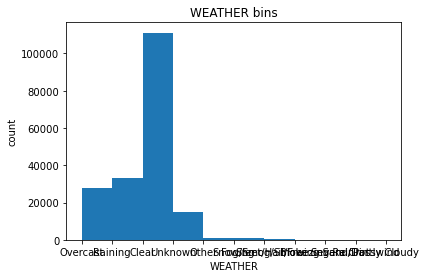

In [111]:
plt.pyplot.hist(df["WEATHER"])
plt.pyplot.xlabel("WEATHER")
plt.pyplot.ylabel("count")
plt.pyplot.title("WEATHER bins")

Text(0.5, 1.0, 'ROADCOND bins')

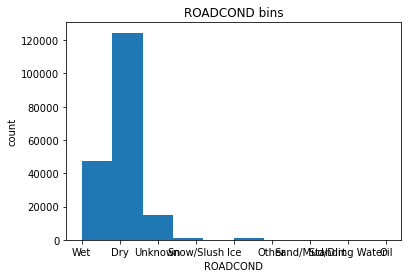

In [112]:
plt.pyplot.hist(df["ROADCOND"])
plt.pyplot.xlabel("ROADCOND")
plt.pyplot.ylabel("count")
plt.pyplot.title("ROADCOND bins")

In [113]:
SEVERITY_df.head()

,Weather - Clear,Weather - Raining,Road Condition - Dry,Road Condition - Wet,SEVERITYCODE
0,0.0,0.0,0.0,1.0,2
1,0.0,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,1
3,1.0,0.0,1.0,0.0,1
4,0.0,1.0,0.0,1.0,2


In [137]:
SEVERITY_df['SEVERITYCODE'] = SEVERITY_df['SEVERITYCODE'].astype('float')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
SEVERITY_df.head()

,Weather - Clear,Weather - Raining,Road Condition - Dry,Road Condition - Wet,SEVERITYCODE
0,0.0,0.0,0.0,1.0,2.0
1,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,2.0


In [147]:
SEVERITY_df["SEVERITYCODE"].replace({1.0:0.0,2.0:1.0}, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [167]:
SEVERITY_df.head()

,Weather - Clear,Weather - Raining,Road Condition - Dry,Road Condition - Wet,SEVERITYCODE
0,0.0,0.0,0.0,1.0,1
1,0.0,1.0,0.0,1.0,0
2,0.0,0.0,1.0,0.0,0
3,1.0,0.0,1.0,0.0,0
4,0.0,1.0,0.0,1.0,1


In [168]:
SEVERITY_df['SEVERITYCODE'] = SEVERITY_df['SEVERITYCODE'].astype('int')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
SEVERITY_df.head()

,Weather - Clear,Weather - Raining,Road Condition - Dry,Road Condition - Wet,SEVERITYCODE
0,0.0,0.0,0.0,1.0,1
1,0.0,1.0,0.0,1.0,0
2,0.0,0.0,1.0,0.0,0
3,1.0,0.0,1.0,0.0,0
4,0.0,1.0,0.0,1.0,1


In [169]:
SEVERITY_df.shape

(189543, 5)

**Defining X, and y for dataset**

In [152]:
X = np.asarray(SEVERITY_df[['Weather - Clear', 'Weather - Raining', 'Road Condition - Dry', 'Road Condition - Wet']])
X[0:5]

array([[0., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [153]:
y = np.asarray(SEVERITY_df['SEVERITYCODE'])
y [0:5]

array([1, 0, 0, 0, 1])

**Normalizing the dataset**

In [154]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.19, -0.46, -1.38,  1.73],
       [-1.19,  2.17, -1.38,  1.73],
       [-1.19, -0.46,  0.72, -0.58],
       [ 0.84, -0.46,  0.72, -0.58],
       [-1.19,  2.17, -1.38,  1.73]])

**Train/Test dataset**

split our dataset into train and test set

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132680, 4) (132680,)
Test set: (56863, 4) (56863,)


**Modeling (Logistic Regression with Scikit-learn)**

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32],
       ...,
       [0.68, 0.32],
       [0.66, 0.34],
       [0.68, 0.32]])

First column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)

**Evaluation**

jaccard index

In [165]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6945465416879165

confusion matrix

In [159]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[    0 17369]
 [    0 39494]]


In [160]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= False,  title='Confusion matrix')

TypeError: 'module' object is not callable

**Classification Report**

In [166]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     39494
           1       0.00      0.00      0.00     17369

   micro avg       0.69      0.69      0.69     56863
   macro avg       0.35      0.50      0.41     56863
weighted avg       0.48      0.69      0.57     56863



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**log loss**

In [164]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5990610314273476

## Results and Discussion <a name="Results"></a>

Text(0.5, 1.0, 'SEVERITYDESC bins')

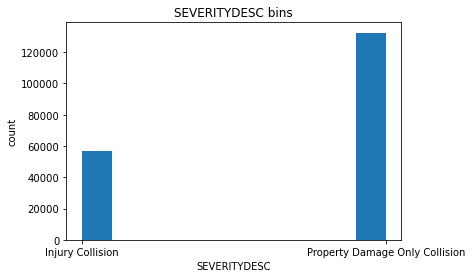

In [172]:
plt.pyplot.hist(df["SEVERITYDESC"])
plt.pyplot.xlabel("SEVERITYDESC")
plt.pyplot.ylabel("count")
plt.pyplot.title("SEVERITYDESC bins")

In [175]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    132451
Injury Collision                   57092
Name: SEVERITYDESC, dtype: int64

In [176]:
df['WEATHER'].value_counts()

Clear                       111116
Raining                      33141
Overcast                     27702
Unknown                      15080
Snowing                        907
Other                          830
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [177]:
df['ROADCOND'].value_counts()

Dry               124432
Wet                47450
Unknown            15068
Ice                 1206
Snow/Slush          1002
Other                132
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [173]:
SEVERITY_df.describe()

,Weather - Clear,Weather - Raining,Road Condition - Dry,Road Condition - Wet,SEVERITYCODE
count,189543.000000,189543.000000,189543.000000,189543.000000,189543.000000
mean,0.586231,0.174847,0.656484,0.250339,0.301209
std,0.492509,0.379837,0.474883,0.433209,0.458784
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132680, 4) (132680,)
Test set: (56863, 4) (56863,)


**Modeling Logistic Regression**

In [178]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.68, 0.32],
       [0.68, 0.32],
       [0.68, 0.32],
       ...,
       [0.68, 0.32],
       [0.66, 0.34],
       [0.68, 0.32]])

First column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)

**jaccard index**

In [179]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6945465416879165

**Classification Report**

In [180]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     39494
           1       0.00      0.00      0.00     17369

   micro avg       0.69      0.69      0.69     56863
   macro avg       0.35      0.50      0.41     56863
weighted avg       0.48      0.69      0.57     56863



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Log loss**

In [181]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5990610314273476

## Conclusion <a name="Conclusion"></a>

The objective was to predic the probability of severity of an accident (injury or property damage only) given the weather and road conditions using Logistic Regression. Accidents with property damage are more likely, also clear weather conditions and dry road conditions have highest number of accidents.